In [206]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
try:
	import gadget
except:
	print('couldnt import gadget!')
import numpy as np
import Param as param
import FigureMove as Fig
import auxiliary_functions as aux
import importlib
import Point2CorFct as point
import random

importlib.reload(aux)
importlib.reload(Fig)

<module 'FigureMove' from '/ll1701/kristian/analysis/analyze_bubblepaper/FigureMove.py'>

In [153]:
folder = '/lustre/kristian/JetSims/PerseusCorrect/R6/E45/X5M1ASFCMy15IRe3E5V3E12/output/'
folder = '/lustre/kristian/JetSims/PerseusCorrect/R4p5/X5NoJet/output/'
folder = '/lustre/kristian/JetSims/PerseusCorrect/R4p5/E45/X0M1ASFCMy15JV2E12NoTurb/output/'
folder = '/lustre/kristian/JetSims/PerseusCorrect/R4p5/E45/X5M1ASFCMy15JV2E12/output/'
snap = Fig.quickImport(50,folder=folder,useTime=True)

folder,snapbase,time
/lustre/kristian/JetSims/PerseusCorrect/R4p5/E45/X5M1ASFCMy15JV2E12/output/ snap_ 50
folder, time /lustre/kristian/JetSims/PerseusCorrect/R4p5/E45/X5M1ASFCMy15JV2E12/output/ 50
/lustre/kristian/JetSims/PerseusCorrect/R4p5/E45/X5M1ASFCMy15JV2E12/output//snap_009.hdf5
Found snap with time (code): 5.14818e-05
generalInfo time:
50.4 Myr


Selected 255328 of 48905218 particles.
Plot range  [38.44965744018555, 1060419.0]


/home/kristian/ArepoR/yt-conda/envs/py365SecTry/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


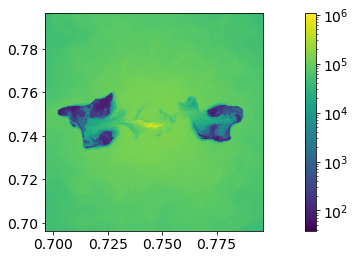

In [154]:
snap.plot_Aslice('rho', logplot=1, colorbar=1, numthreads=16, box=[0.1,0.1])

Selected 255328 of 48905218 particles.


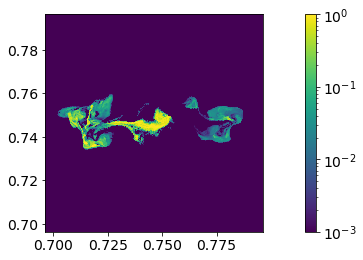

In [155]:
snap.plot_Aslice('pass00', logplot=1, colorbar=1, numthreads=16, box=[0.1,0.1], vrange=[1e-3,1])

In [156]:
snap.data['vkms'] = aux.get_Velocity(snap)

using following center to calculate distance to center:
[746.2686567164178, 746.2686567164178, 746.2686567164178]
pos max 1492.53 min 0.00522541


In [157]:
snap.data['bGau'] = aux.get_MagneticField(snap)
aux.printDebug(snap.bGau[snap.dkpc<100])

('data', array([[ 3.72927900e-07, -1.40049833e-05,  1.03186703e-05],
       [ 2.67154064e-06, -1.45757385e-05,  9.98585256e-06],
       [ 4.79252230e-06, -1.79670515e-05,  8.59014381e-06],
       ...,
       [ 5.10721839e-06, -6.17663045e-06,  7.36123729e-06],
       [ 5.45033981e-06, -5.83050314e-06,  5.74059595e-06],
       [ 5.82141320e-06, -6.16291527e-06,  7.39574671e-06]], dtype=float32))
('data', ':min', -7.972874e-05)
('data', ':max', 6.030575e-05)
('data', ':average', 9.527969e-08)
('data', ':mean', 9.527969e-08)
('data', ':shape', (17675209, 3))


In [158]:
aux.printDebug(snap.dkpc)

('data', array([141.51453, 142.16525, 142.45241, ..., 381.9346 , 381.0619 ,
       377.40353], dtype=float32))
('data', ':min', 0.12994592)
('data', ':max', 1286.306)
('data', ':average', 182.74614)
('data', ':mean', 182.74614)
('data', ':shape', (48905217,))


In [159]:
snap.data['velz'] = aux.get_VelocityZ(snap)
aux.printDebug(snap.velz)
snap.data['velx'] = aux.get_VelocityX(snap)
aux.printDebug(snap.velx)
snap.data['vely'] = aux.get_VelocityY(snap)
aux.printDebug(snap.vely)

('data', array([ 17.750263,  33.71339 ,  52.864174, ..., 149.36319 , 156.50279 ,
        77.116264], dtype=float32))
('data', ':min', -2434.1074)
('data', ':max', 1855.2311)
('data', ':average', -0.18271822)
('data', ':mean', -0.18271822)
('data', ':shape', (48905217,))
('data', array([  42.311375,   57.04929 ,   62.397644, ..., -146.67804 ,
       -119.85792 , -144.18214 ], dtype=float32))
('data', ':min', -2290.3506)
('data', ':max', 2678.4119)
('data', ':average', -2.0864792)
('data', ':mean', -2.0864792)
('data', ':shape', (48905217,))
('data', array([-37.380444, -65.43145 , -93.17521 , ...,  90.25333 ,  46.726192,
       -13.744743], dtype=float32))
('data', ':min', -2093.684)
('data', ':max', 4151.9595)
('data', ':average', 0.05741188)
('data', ':mean', 0.05741188)
('data', ':shape', (48905217,))


In [171]:
FILAMENT = True
DIM = 1
RadCut = 12 #in kpc
INNER = False
OUTER = True
if FILAMENT:
    mask = np.logical_and(snap.dkpc<100,snap.pass00>1e-3)
else:
    mask = snap.dkpc<100
if INNER:
    mask = np.logical_and(mask, snap.dkpc<RadCut)
elif OUTER:
    mask = np.logical_and(mask, snap.dkpc>RadCut)
    
pos = snap.pos[snap.type==0][mask]
value = snap.vely[mask]
aux.printDebug(value)

('data', array([-567.4277, -657.6388, -507.4327, ...,  268.718 ,  277.6837,
        238.2127], dtype=float32))
('data', ':min', -2093.684)
('data', ':max', 4151.9595)
('data', ':average', 7.401743)
('data', ':mean', 7.401743)
('data', ':shape', (1370673,))


In [173]:
NIDS = 1000
Ids = random.sample(set(np.arange(1,np.shape(pos)[0])), NIDS)

In [199]:
bins = np.linspace(0,300,100)
bins = 10**(np.linspace(np.log10(1e-4),np.log10(np.sqrt(3)*0.2),100))
# print(bins)
if DIM==1:
    functionValues=point.calcDistance1D
else:
    functionValues=point.calcDistance
bins, corr = point.get2PointCorr(pos, value, bins, calculateIds=Ids, numthreads=16, functionValues=functionValues)

KeyboardInterrupt: 

In [306]:
import Point2CorFct as point
import random
import auxiliary_functions as aux
import FigureMove as Fig
importlib.reload(point)

class CorrelationFunction:
    def __init__(self, variable, snapNum, snapFolder, ptype=0, useTime=True, numthreads=16, INFO=None, verbose=0):
        '''
        pos (array): position values  as (N,Dim)
        value (array): values of property of interest as (N,Dim)
        '''
        self.snap = Fig.quickImport(snapNum, folder=snapFolder, useTime=useTime, INFO=INFO)
        self.values = aux.get_value(variable, self.snap, INFO=INFO)
        self.positions = self.snap.pos[self.snap.type==ptype]
        if np.shape(self.positions)[0] != np.shape(self.values)[0]:
            raise Exception('positions and values need to have same shape')
        self.numthreads = numthreads
        self.maskNamesPrevious = None
        self.maskParametersPrevious = None
        self.minBin = None
        self.maxBin = None
        self.mask = None
        self.redidMask = True
        self.verbose = verbose
        
    def checkNewMask(self):
        if self.maskNamesPrevious is None or self.maskParametersPrevious is None:
            if self.verbose>0:
                print('redo mask')
            status = True
        elif self.maskNamesPrevious != self.maskNames:
            if self.verbose>0:
                print('redo mask')
            status = True
        elif any([x!=y for x,y in zip(self.maskParametersPrevious,[self.maxRkpc, self.filThresh, self.inoutRkpc])]):
            if self.verbose>0:
                print('redo mask')
            status = True
        else:
            if self.verbose>0:
                print('keep mask')
            status = False
        self.redidMask = status
        return status
    
    def getMask(self):
        '''
        mask (str or list(str)): 'inner', 'outer', 'filament'
        '''
        if type(self.maskNames) == str:
            self.maskNames = list(self.maskNames)
        if 'dkpc' not in self.snap.data.keys():
            self.snap.data['dkpc'] = aux.get_DistanceToCenterInKpc(self.snap)
        self.mask = self.snap.dkpc<self.maxRkpc
        print('considering cells within [kpc] ', self.maxRkpc)
        if 'filament' in self.maskNames:
            if self.verbose>=0:
                print('filament mask: considering particles with pass00>%g'%self.filThresh)
            self.mask = np.logical_and(self.mask,self.snap.pass00>self.filThresh)
        if 'inner' in self.maskNames:
            if self.verbose>=0:
                print('inner mask: considering cells within %g [kpc] '%self.inoutRkpc)
            self.mask = np.logical_and(self.mask, self.snap.dkpc<self.inoutRkpc)
        if 'outer' in self.maskNames:
            if self.verbose>=0:
                print('inner mask: considering cells beyond %g [kpc] '%self.inoutRkpc)
            self.mask = np.logical_and(self.mask, self.snap.dkpc>self.inoutRkpc)
        self.maskNamesPrevious = self.maskNames
        self.maskParametersPrevious = [self.maxRkpc, self.filThresh, self.inoutRkpc] 
        
    def calcPoint2Corr(self, maskNames, nIDs=1000, maxRkpc=100, filThresh=1e-3, inoutRkpc=12, vrange=[None,None], nBins=100, logBins=True):
        self.maskNames = maskNames
        self.nIDs = nIDs
        self.maxRkpc = maxRkpc
        self.filThresh = filThresh
        self.inoutRkpc = inoutRkpc
        if self.checkNewMask() or self.mask is None:
            self.getMask()
        minBin = vrange[0]
        if minBin is not None:
            self.minBin = minBin
        else:
            if self.minBin is None or self.redidMask:
                if self.verbose>0:
                    print('calc minBin')
                self.minBin = np.min(self.snap.vol[self.mask])**(1/3.)
        maxBin = vrange[1]
        if maxBin is not None:
            self.maxBin = maxBin
        else:
            if self.maxBin is None or self.redidMask:
                if self.verbose>0:
                    print('calc maxBin')
                self.maxBin = np.sqrt(np.sum((np.min(self.positions[self.mask],axis=0)-np.max(self.positions[self.mask],axis=0))**2))
        self.binEdges, minBEdg, maxBEdg = aux.getBinsMMs(Variable=None, Min=self.minBin, Max=self.maxBin, N=nBins, log=logBins)        
        self.Ids = random.sample(set(np.arange(1,np.shape(self.positions)[0])), self.nIDs)
        functionValues = point.calcDistance1D
        try:
            if np.shape(self.values)[1] in [2,3]:
                functionValues=point.calcDistance
        except:
            if self.verbose>0:
                print('1D values!')
        self.binEdges, self.corrRaw, self.corrCounts = point.get2PointCorr(self.positions[self.mask], self.values[self.mask], self.binEdges, calculateIds=self.Ids, numthreads=self.numthreads, functionValues=functionValues)
        self.bins, self.corr = self.binEdges[1:]+np.diff(self.binEdges)/2.,self.corrRaw[1:-1]
        
    def visualizeSnap(self):
        plt.figure()
        self.snap.plot_Aslice('rho', logplot=1, colorbar=1, numthreads=self.numthreads, box=[0.1,0.1])
    
    def plotPoint2Corr(self, *args, **kwargs):
        ax = self.plot(self.bins, self.corr, *args, **kwargs)
        return ax
    
    def plot(self, x, y, *args, scatter=False, absolute=False, ax=None, binData=False, NBins=100, binLog=True, powerspec=False, **kwargs):
        if powerspec:
            absolute = True
        if ax is None:
            ax = plt.gca()
        if absolute:
            x = np.abs(x)
            y = np.abs(y)
        if binData:
            x, y, err = Fig.do_Radprof(x, y, weight=None,range=[None,None],log=binLog,NBins=NBins,typeCalc='median',errbar=None, return_binedges=False, SameNumberPointsPerBin=False)
        if powerspec:
            y = y**2*x**2
        sort = np.argsort(x)
        x = x[sort]
        y = y[sort]
        if not scatter:
            ax.plot(x, y, *args, **kwargs)
        else:
            ax.scatter(x, y, *args, **kwargs)
        return ax

In [314]:
folder = '/lustre/kristian/JetSims/PerseusCorrect/R6/E45/X5M1ASFCMy15IRe3E5V3E12/output/'
folder = '/lustre/kristian/JetSims/PerseusCorrect/R4p5/X5NoJet/output/'
folder = '/lustre/kristian/JetSims/PerseusCorrect/R4p5/E45/X0M1ASFCMy15JV2E12NoTurb/output/'
folder = '/lustre/kristian/JetSims/PerseusCorrect/R4p5/E45/X5M1ASFCMy15JV2E12/output/'
# folder = '/lustre/kristian/JetSims/PerseusCorrect/R6/E45/X5M1ASFCMy15/output/'
INFO = {}
INFO['unitsV'] = 'kms'
del CF
VX = CorrelationFunction('VelocityX', 50, folder, INFO=INFO)
VY = CorrelationFunction('VelocityY', 50, folder, INFO=INFO)
VZ = CorrelationFunction('VelocityZ', 50, folder, INFO=INFO)


folder,snapbase,time
/lustre/kristian/JetSims/PerseusCorrect/R4p5/E45/X5M1ASFCMy15JV2E12/output/ snap_ 50
folder, time /lustre/kristian/JetSims/PerseusCorrect/R4p5/E45/X5M1ASFCMy15JV2E12/output/ 50
/lustre/kristian/JetSims/PerseusCorrect/R4p5/E45/X5M1ASFCMy15JV2E12/output//snap_009.hdf5
Found snap with time (code): 5.14818e-05
generalInfo time:
50.4 Myr
VelocityX
units velocity:  kms
folder,snapbase,time
/lustre/kristian/JetSims/PerseusCorrect/R4p5/E45/X5M1ASFCMy15JV2E12/output/ snap_ 50
folder, time /lustre/kristian/JetSims/PerseusCorrect/R4p5/E45/X5M1ASFCMy15JV2E12/output/ 50
/lustre/kristian/JetSims/PerseusCorrect/R4p5/E45/X5M1ASFCMy15JV2E12/output//snap_009.hdf5
Found snap with time (code): 5.14818e-05
generalInfo time:
50.4 Myr
VelocityY
units velocity:  kms
folder,snapbase,time
/lustre/kristian/JetSims/PerseusCorrect/R4p5/E45/X5M1ASFCMy15JV2E12/output/ snap_ 50
folder, time /lustre/kristian/JetSims/PerseusCorrect/R4p5/E45/X5M1ASFCMy15JV2E12/output/ 50
/lustre/kristian/JetSims/Per

using following center to calculate distance to center:
[746.2686567164178, 746.2686567164178, 746.2686567164178]
pos max 1492.53 min 0.00522541
considering cells within [kpc]  100
total counts in correlation:  17675209000.0
considering cells within [kpc]  100
filament mask: considering particles with pass00>0.001
inner mask: considering cells within 12 [kpc] 
total counts in correlation:  53494000.0
considering cells within [kpc]  100
filament mask: considering particles with pass00>0.001
inner mask: considering cells beyond 12 [kpc] 
total counts in correlation:  1370673000.0


NameError: name 'CF' is not defined

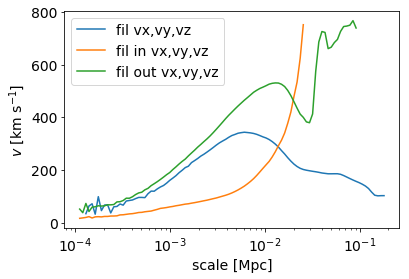

Exception in thread Thread-92:
Traceback (most recent call last):
  File "/home/kristian/ArepoR/yt-conda/envs/py365SecTry/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/kristian/ArepoR/yt-conda/envs/py365SecTry/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/home/kristian/ArepoR/yt-conda/envs/py365SecTry/lib/python3.6/multiprocessing/pool.py", line 405, in _handle_workers
    pool._maintain_pool()
  File "/home/kristian/ArepoR/yt-conda/envs/py365SecTry/lib/python3.6/multiprocessing/pool.py", line 246, in _maintain_pool
    self._repopulate_pool()
  File "/home/kristian/ArepoR/yt-conda/envs/py365SecTry/lib/python3.6/multiprocessing/pool.py", line 239, in _repopulate_pool
    w.start()
  File "/home/kristian/ArepoR/yt-conda/envs/py365SecTry/lib/python3.6/multiprocessing/process.py", line 105, in start
    self._popen = self._Popen(self)
  File "/home/kristian/ArepoR/yt-conda/envs/py365SecTry/lib

In [315]:
figure = plt.figure()
NIDS = 1000
vrange = [1e-4, np.sqrt(3)*1e-1]
for name,obj in zip(['vx,vy,vz'],[VX,VY,VZ]):
    obj.calcPoint2Corr('filament', nIDs=NIDS, vrange=vrange)
    ax = obj.plotPoint2Corr(label='fil %s' %name)
    obj.calcPoint2Corr(['filament','inner'], nIDs=NIDS, vrange=vrange)
    ax = obj.plotPoint2Corr(label='fil in %s' %name)
    obj.calcPoint2Corr(['filament','outer'], nIDs=NIDS, vrange=vrange)
    ax = obj.plotPoint2Corr(label='fil out %s' %name)
ax = Fig.modifyPlot(ax, xlog=1, ylog=0, xlabel='scale [Mpc]', ylabel=r'$v\ [\mathrm{km}\ \mathrm{s}^{-1}]$')
ax.legend()
figure.savefig('../../figures/BCorr/fidR4p5VXYZN%i.pdf'%(CF.nIDs))

In [310]:
CF.corrCounts

array([1.8050000e+03, 4.7200000e+02, 6.1600000e+02, 7.6400000e+02,
       1.0280000e+03, 1.2550000e+03, 1.7040000e+03, 2.0590000e+03,
       2.7330000e+03, 3.4750000e+03, 4.1890000e+03, 5.1950000e+03,
       6.3460000e+03, 7.2900000e+03, 8.4920000e+03, 9.8440000e+03,
       1.1099000e+04, 1.2177000e+04, 1.3633000e+04, 1.4652000e+04,
       1.5530000e+04, 1.6234000e+04, 1.6313000e+04, 1.6191000e+04,
       1.6204000e+04, 1.6723000e+04, 1.7844000e+04, 1.9735000e+04,
       2.2310000e+04, 2.5391000e+04, 2.9806000e+04, 3.6022000e+04,
       4.3651000e+04, 5.2604000e+04, 6.3163000e+04, 7.7241000e+04,
       9.2439000e+04, 1.1106400e+05, 1.3293200e+05, 1.5800700e+05,
       1.8793200e+05, 2.2059100e+05, 2.5644500e+05, 3.0032200e+05,
       3.4729200e+05, 4.0420500e+05, 4.6718600e+05, 5.3973100e+05,
       6.2629800e+05, 7.2526900e+05, 8.4261400e+05, 9.7278600e+05,
       1.1211910e+06, 1.2851510e+06, 1.4714970e+06, 1.6796430e+06,
       1.9071350e+06, 2.1525090e+06, 2.4251560e+06, 2.7206110e

... saved ../../figures/BCorr/Fil00OuR12R4p5VXCorrN1000.pdf


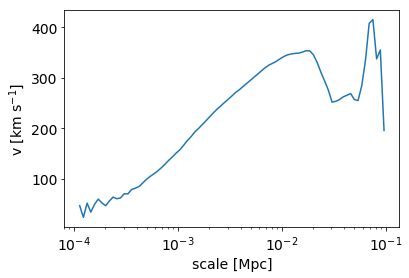

In [217]:
fig = plt.figure()
ax = plt.gca()
ax.plot(bins[1:]+np.diff(bins)/2.,corr[1:-1])
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('scale [Mpc]')
ax.set_ylabel(r'v [$\mathrm{km}\ \mathrm{s}^{-1}$]')
addName = ''
if FILAMENT:
    addName += 'Fil00'
if INNER:
    addName += 'InR%g' %RadCut
if OUTER:
    addName += 'OuR%g' %RadCut
filename = '../../figures/BCorr/%sR4p5VXCorrN%i.pdf'%(addName,NIDS)
fig.savefig(filename)
print('... saved %s'%filename)